## This notebook analyzes:
* Distribution of classes
* Distribution of cameras
* Distribution of drivers

In [2]:
import glob
import os

import cv2
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('3244 data new.csv')
df

,Dataset,Class,Camera,Direction facing,Sex,Driver,Number of pics,Start file,End file
0,unseen,c0,1,Right,M,1,104,000.jpg,00117.jpg
1,unseen,c0,2,Left,F,5,40,10794.jpg,109694.jpg
2,unseen,c1,1,Right,M,1,95,016.jpg,0361.jpg
3,unseen,c1,2,Left,F,5,80,117967.jpg,1393310.jpg
4,unseen,c2,1,Right,M,1,89,024.jpg,0440.jpg
...,...,...,...,...,...,...,...,...,...
447,train,c7,2,Left,M,38,20,1988061.jpg,1988613.jpg
448,train,c7,2,Left,F,39,20,19016032.jpg,19017339.jpg
449,train,c7,2,Left,M,40,20,19107934.jpg,19108682.jpg
450,train,c7,2,Left,F,43,20,19118071.jpg,19118933.jpg


In [5]:
# NOTE: file order in above csv might not be the same as file order returned by glob.glob.
# Default order doesn't work because 09999.jpg and 091000.jpg might belong to the same driver, 
# but 091000.jpg will appear much earlier
#
# Use the function below to return it in the same order.
# We could use this info to do very specific forms of sampling, e.g. sampling by driver.

func = lambda x: f'{x.split("/")[-1]:>015.15s}'
filepaths = sorted(glob.glob('Distracted Driver Dataset/Combined New/train/c7/*'), key=func)
filepaths[:10]

['Distracted Driver Dataset/Combined New/train/c7/0966.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0967.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0968.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0969.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0970.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0971.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0972.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0973.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0974.jpg',
 'Distracted Driver Dataset/Combined New/train/c7/0975.jpg']

In [3]:
df_2 = df.groupby(by=['Dataset','Camera','Class']).agg(num_pics=('Number of pics','sum'),
                                               num_drivers=('Driver','nunique'),
                                               drivers=('Driver','unique'))
df_2

num_pics  num_drivers  \
Dataset Camera Class                          
test    1      c0          266            4   
               c1          233            3   
               c2          204            3   
               c3           90            3   
               c4           63            3   
               c5           63            3   
               c6           66            3   
               c7          138            3   
        2      c0           80            3   
               c1          160            3   
               c2          160            3   
               c3           80            3   
               c4           80            3   
               c5           80            3   
               c6           80            3   
               c7           80            3   
train   1      c0         2440           26   
               c1         2049           28   
               c2         1812           28   
               c3          753           27   
               c4          733           28   
               c5          691           27   
               c6          698           28   
               c7         1379           27   
        2      c0          200           10   
               c1          400           10   
               c2          400           10   
               c3          200           10   
               c4          200           10   
               c5          200           10   
               c6          200           10   
               c7          200           10   

                                                                drivers  
Dataset Camera Class                                                     
test    1      c0                                          [1, 2, 3, 4]  
               c1                                             [1, 2, 3]  
               c2                                             [1, 2, 3]  
               c3                                             [1, 2, 3]  
               c4                                             [1, 2, 3]  
               c5                                             [1, 2, 3]  
               c6                                             [1, 2, 3]  
               c7                                             [1, 2, 3]  
        2      c0                                             [5, 7, 6]  
               c1                                             [7, 5, 6]  
               c2                                             [7, 5, 6]  
               c3                                             [7, 5, 6]  
               c4                                             [7, 5, 6]  
               c5                                             [7, 5, 6]  
               c6                                             [7, 5, 6]  
               c7                                             [7, 5, 6]  
train   1      c0     [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...  
               c1     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c2     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c3     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c4     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c5     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c6     [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...  
               c7     [4, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, ...  
        2      c0              [44, 35, 36, 37, 38, 39, 40, 41, 42, 43]  
               c1              [44, 35, 36, 37, 42, 38, 39, 41, 40, 43]  
               c2              [39, 44, 35, 36, 37, 42, 38, 40, 43, 41]  
               c3              [39, 44, 35, 36, 37, 42, 38, 40, 43, 41]  
               c4              [44, 35, 36, 37, 42, 38, 39, 40, 43, 41]  
               c5              [44, 35, 36, 37, 42, 38, 39, 40, 43, 41]  
               c6              [44, 35, 36, 37, 42, 38,

## Bar plot of distribution of cameras
* Why important? Because drivers are facing right for Camera 1 and left for Camera 2
* Test data is more even than training data

In [ ]:
# Count version

datasets = ['train','test']
cameras = ['1','2']
labels = [f'c{i}' for i in range(8)]

width = 0.5

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

for i, a in enumerate(ax):
    
    heights = dict({'Camera 1': df_2.loc[datasets[i],cameras[0]]['num_pics'].to_list(),
               'Camera 2': df_2.loc[datasets[i],cameras[1]]['num_pics'].to_list()})
    
    bottom = np.zeros(8)

    for label, height in heights.items():
        a.bar(labels, height, width, label=label, bottom=bottom)
        bottom += height

    a.set_title(f'Origin of {datasets[i]} data')
    a.set_xlabel('Class')
    a.legend(bbox_to_anchor=(1,1))
    
ax[0].set_ylabel('Number of pictures')
plt.tight_layout()
plt.show()

In [20]:
cam1 = []
cam2 = []

for i in range(8):
    files = glob.glob(f'Distracted Driver Dataset/Combined New/train/c{i}/*')
    
    cam1.append(len([file for file in files if file.split("/")[-1][0] == '0']))
    cam2.append(len([file for file in files if file.split("/")[-1][0] == '1']))

In [21]:
cam3 = []
cam4 = []

for i in range(8):
    files = glob.glob(f'Distracted Driver Dataset/Combined New/test/c{i}/*')
    
    cam3.append(len([file for file in files if file.split("/")[-1][0] == '0']))
    cam4.append(len([file for file in files if file.split("/")[-1][0] == '1']))

In [24]:
cmr_1 = [cam1,cam3]
cmr_2 = [cam2,cam4]

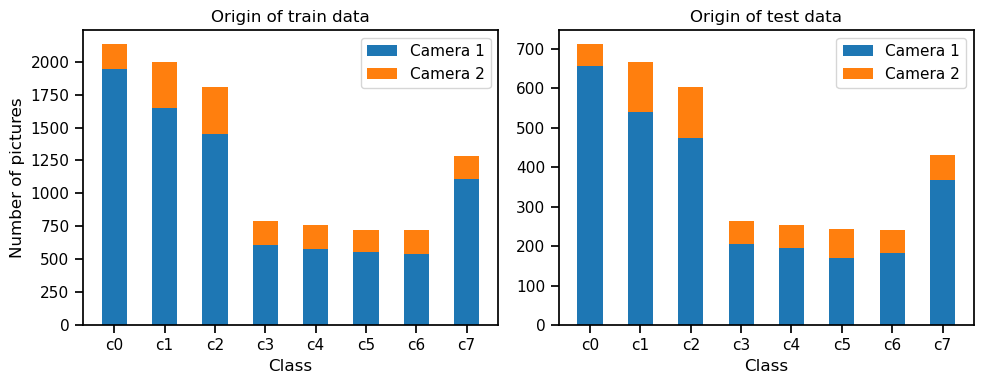

In [25]:
# Count version

datasets = ['train','test']
cameras = ['1','2']
labels = [f'c{i}' for i in range(8)]
colors = ['#1e77b4','#ff7f0e']

width = 0.5

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

for i, a in enumerate(ax):
    
    heights = dict({'Camera 1': cmr_1[i],
               'Camera 2': cmr_2[i]})
    
    bottom = np.zeros(8)

    counter = 0
    for label, height in heights.items():
        a.bar(labels, height, width, label=label, bottom=bottom, color=colors[counter])
        bottom += height
        counter += 1

    a.set_title(f'Origin of {datasets[i]} data')
    a.set_xlabel('Class')
    a.legend(bbox_to_anchor=(1,1))
    
ax[0].set_ylabel('Number of pictures')
plt.tight_layout()
plt.show()

## Scatter plot to show how the different drivers are distributed
* There are no overlaps - none of the drivers is in both `train` and `test` for the same class
* One of the drivers (#4) is in `test` for **c0** but `train` for **c1-7**
* Drivers for `test` are more evenly split (only slightly more **Camera 1**) than those for `train` (a lot more **Camera 1**)
* Some drivers have a lot more pics than other drivers

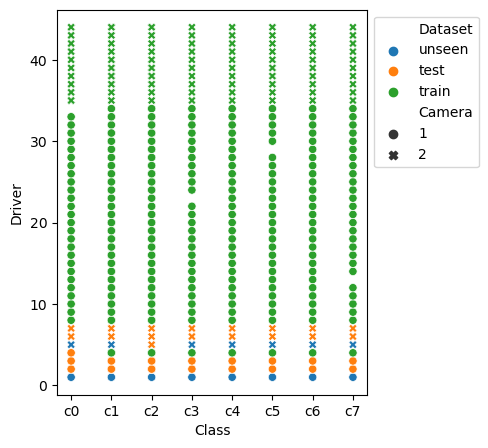

In [6]:
plt.figure(figsize=(4,5))
sns.scatterplot(data=df, x='Class', y='Driver', hue='Dataset', style='Camera')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [4]:
drivers = list(range(1,45))
pic_count_train = []
pic_count_test = []

for i in drivers:
    pic_count_train.append(df[df['Dataset'] == 'train'][df['Driver'] == i]['Number of pics'].sum())
    #dataset.append('train')
    pic_count_test.append(df[df['Dataset'] == 'test'][df['Driver'] == i]['Number of pics'].sum())
    #dataset.append('test')
    
driver_pic_dict_train = dict({'Driver':drivers,'Number of pictures':pic_count_train})
driver_pic_dict_test = dict({'Driver':drivers,'Number of pictures':pic_count_test})
driver_pic_df_train = pd.DataFrame(driver_pic_dict_train)
driver_pic_df_test = pd.DataFrame(driver_pic_dict_test)

/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_25661/2191631485.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pic_count_train.append(df[df['Dataset'] == 'train'][df['Driver'] == i]['Number of pics'].sum())
/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_25661/2191631485.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pic_count_test.append(df[df['Dataset'] == 'test'][df['Driver'] == i]['Number of pics'].sum())


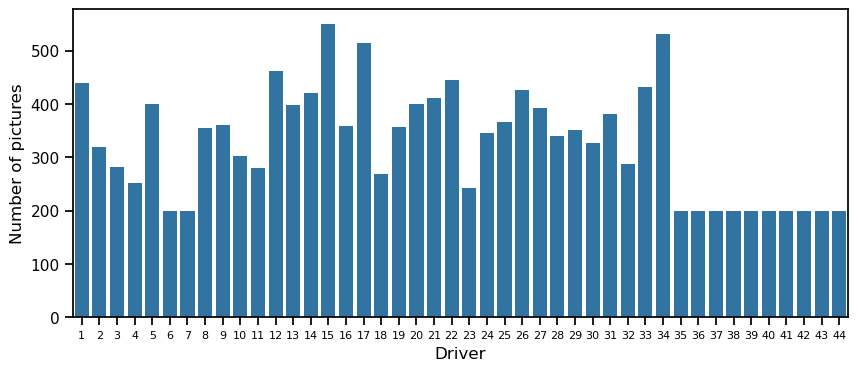

In [30]:
sns.set_context('notebook')
plt.figure(figsize=(10,4))
sns.barplot(data=driver_pic_df_train, x='Driver',y='Number of pictures',color='#1e77b4')
sns.barplot(data=driver_pic_df_test, x='Driver',y='Number of pictures',color='#1e77b4')
plt.xticks(fontsize=8)

#sns.barplot(data=driver_pic_df_train, x='Driver',y='Number of pictures',color='darkblue',label='Train')
#sns.barplot(data=driver_pic_df_test, x='Driver',y='Number of pictures',color='aqua',label='Test')

#plt.vlines(ymin=0,ymax=300,x=33.5, linestyle='--', lw=.7, color='magenta')
#plt.vlines(ymin=0,ymax=300,x=43.5, linestyle='--', lw=.7, color='magenta')
#plt.hlines(y=300,xmin=33.5, xmax=43.5, linestyle='--', lw=.7, color='magenta')
#plt.text(s='Camera 2',y=240,x=36,color='magenta')

#plt.vlines(ymin=0,ymax=440,x=3.5, linestyle='--', lw=.7, color='magenta')
#plt.vlines(ymin=0,ymax=440,x=6.5, linestyle='--', lw=.7, color='magenta')
#plt.hlines(y=440,xmin=3.5, xmax=6.5, linestyle='--', lw=.7, color='magenta')
#plt.text(s='Camera 2',y=455,x=3,color='magenta')

#plt.legend()
plt.show()